# 10. 스택의 응용-수식의 후위 표기법

-----


## 1) 중위 표기법과 후위 표기법

- 중위 표기법(infix notation) : 연산자가 피연산자들의 **사이**에 위치      
ex) (A + B) * (C + D)    


- 후위 표기법(postfix notation) : 연산자가 피연산자들의 **뒤**에 위치   
ex) AB + CD + *

> 중위표현식을 후위표현식으로 스택 자료구조를 통해 바꿔보자!
ex) A*B+C > AB*C+    

> 연산자의 우선순위를 지키기 위해 스택을 이용한다

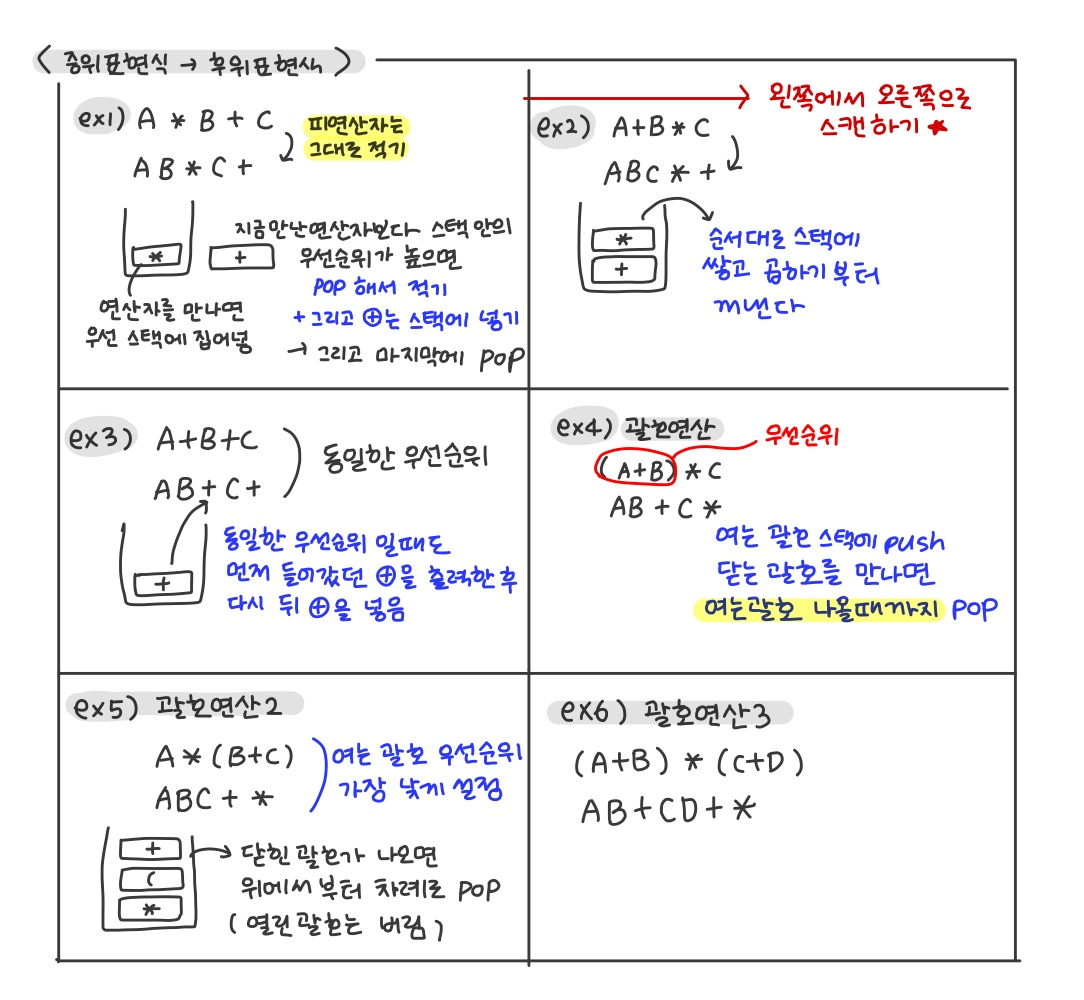

----

## 2) 후위표기법 알고리즘의 설계   


#### 1. 연산자의 우선순위 설정


In [1]:
# 우선순위 딕셔너리
prec={
    '*':3, '/':3, '+':2, '-':2, '(':1
}

#### 2. 중위표현식을 왼쪽부터 한글자씩 읽기    


- 피연산자면 그냥 출력
- 여는 괄호면 스택에 push, 닫은 괄호면 여는 괄호가 나올때까지 스택에서 pop
- 연산자이면 스택에서 이보다 높(같은) 우선순위의 것들을 pop
- 마지막에 스택에 남아있는 연산자는 모두 pop해서 출력  

> - 스택의 맨 위에 있는 연산자와 우선순위를 비교 : 스택의 peek() 연산 이용
> - 스택에 남아있는 연산자를 모두 pop하는 순환문 : while not opStack.isEmpty() : (스택이 empty가 아닌 동안)

In [43]:
class ArrayStack:

    def __init__(self):
        self.data = []

    def size(self):
        return len(self.data)

    def isEmpty(self):
        return self.size() == 0

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

    def peek(self):
        return self.data[-1]

# 우선순위 지정하는 딕셔너리
prec = {
    '*': 3, '/': 3,
    '+': 2, '-': 2,
    '(': 1
}

# 후위 표현식 변환 함수 (S : 중위표현식을 따르는 수식)
def solution(S):
    opStack = ArrayStack()  # 스택 객체
    answer = ''
    
    for c in S:     # 왼쪽부터 차례대로 읽음
        # 피연산자 일 때
        if c not in prec:
            answer += c
            
        # 연산자일 때
        else:   
            if opStack.isEmpty() or c in '(' :  # 비어있거나 열린괄호
                opStack.push(c)
                
            else:                               # 비어있지 않을 때
                last = opStack.peek()    
                # 새로운 연산자가 우선순위가 높을 때
                if prec[last] < prec[c] :    
                    opStack.push(c)
            
                # 새로운 연산자가 우선순위가 낮을 때
                elif prec[last] >= prec[c] :
                    answer += opStack.pop()
                    opStack.push(c)
            
            # 닫힌 괄호 들어올 때 > 여는 괄호 나올때까지 pop

                else:
                    while opStack.pop()=='(':
                         answer += opStack.pop()
                        
# 마지막에 스택에 남아있는 것들은 전부다 pop
    while not opStack.isEmpty():
#         if opStack.pop() not in '()':
            answer += opStack.pop()
            
    return answer

solution('A+B+C')   ## 괄호일 때 수정 필요!!!!
## 괄호는 pop할때 생략해줘야함....!

'AB+C+'